## Importação das bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import plotly.express as px
from plotly.offline import iplot
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import altair as alt

## Carregando a base de dados

In [3]:
df = pd.read_excel('/content/drive/My Drive/Análise_e_Visualização_de_Dados_com_Python/Material_de_Apoio/Bolsa.xlsx')

In [4]:
df.head()

,data_hora,cotacao,minima,maxima,variaçao,variaçao_percentual,volume
0,2020-09-25,96999.38,95631.74,97011.80,-12.69,-0.01,7351088
1,2020-09-24,97012.07,95652.56,97954.63,1277.25,1.33,9331043
2,2020-09-23,95734.82,95728.13,97388.94,-1558.72,-1.60,8830686
3,2020-09-22,97293.54,96390.28,97684.16,302.82,0.31,7281307
4,2020-09-21,96990.72,95820.34,98282.75,-1298.99,-1.32,9738004


In [ ]:
df.shape

(127, 7)

In [ ]:
df.describe()

,cotacao,minima,maxima,variaçao,variaçao_percentual,volume
count,127.000000,127.000000,127.000000,127.000000,127.000000,1.270000e+02
mean,92322.255433,91077.130236,93439.735197,151.690787,0.192598,9.992320e+06
std,10262.375211,10441.271131,10007.622423,1644.889862,1.922612,2.185589e+06
min,69537.560000,67802.470000,72241.090000,-4342.690000,-5.510000,0.000000e+00
25%,80968.320000,79580.905000,82054.025000,-1190.535000,-1.225000,8.989904e+06
50%,96203.200000,95343.520000,97388.940000,23.390000,0.020000,9.861239e+06
75%,100787.540000,99706.910000,101770.715000,1305.320000,1.500000,1.112025e+07
max,105605.170000,104111.750000,105703.620000,4535.420000,6.520000,1.655091e+07


Pode-se perceber que não qualquer dado faltante, visto que são 127 instâncias na base de dados e para as 7 colunas todas estas instâncias foram contabilizadas.

## Observando as cotações, as variações e o volume em relação às datas.

In [ ]:
df.set_index('data_hora',inplace=True)

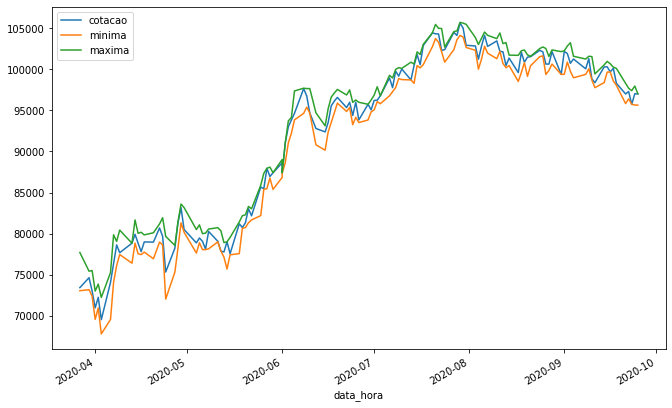

In [ ]:
plt.figure(figsize=(11,7))
df['cotacao'].plot()
df['minima'].plot()
df['maxima'].plot()
plt.legend()

Pode-se perceber um crescimento na cotação de Abril até Agosto de 2020. A partir deste mês, a cotação começou a apresentar ligeira queda. Também observa-se que não existe grande diferença entre as cotações mínimas e máximas durante os meses.

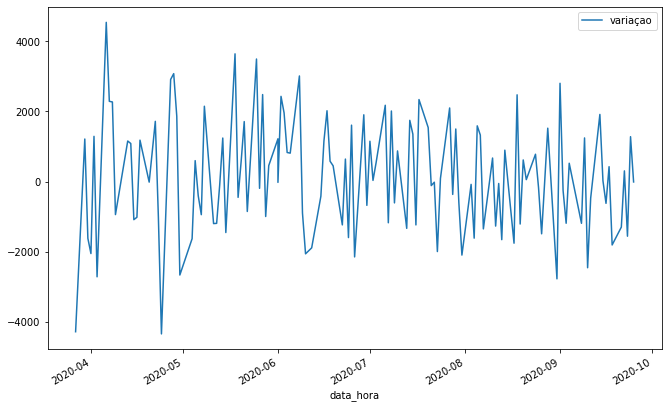

In [ ]:
plt.figure(figsize=(11,7))
df['variaçao'].plot()
plt.legend()

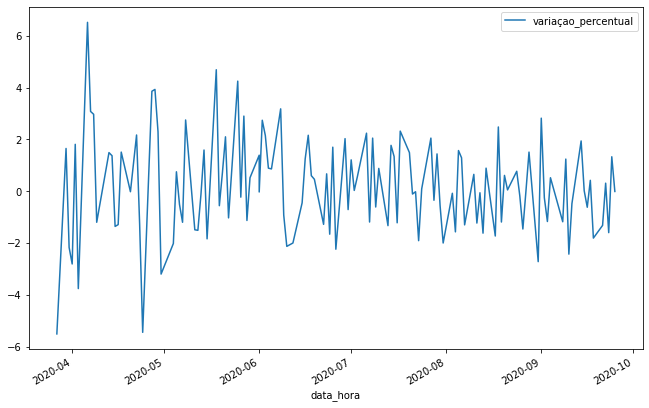

In [ ]:
plt.figure(figsize=(11,7))
df['variaçao_percentual'].plot()
plt.legend()

As variações se mantiveram estáveis durante o período e em torno de 0.

Text(0.5, 0, 'data_hora')

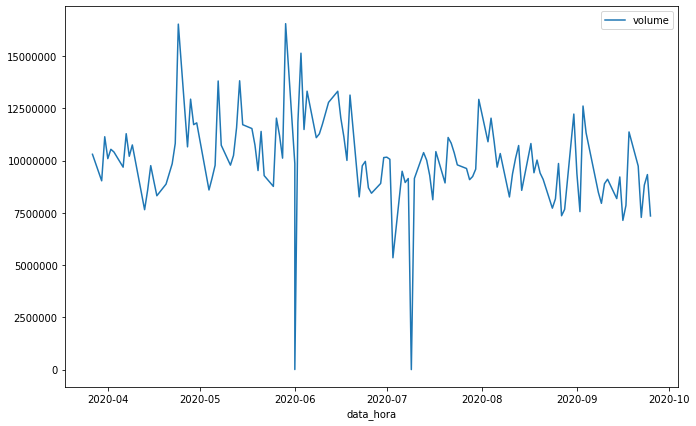

In [20]:
plt.figure(figsize=(11,7))
plt.plot(df['data_hora'],df['volume'])
plt.ticklabel_format(style='plain', axis='y')
plt.legend(['volume'])
plt.xlabel('data_hora')

As variações e volume se mantiveram estáveis ao longo do mesmo período. As variações se mantiveram estáveis em torno de 0 e o volume se manteve esteve em torno de 10.000.000, com uma queda brusca somente no fim do mês de maio e em um período no meio do mês de julho.

## Visualização dos variáveis individualmente

<Figure size 1080x360 with 0 Axes>

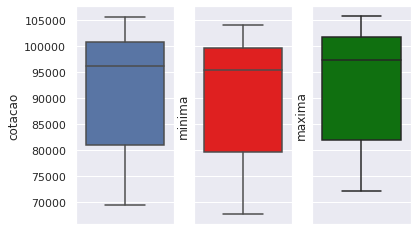

In [ ]:
sns.set()

plt.figure(figsize=(15,5))
fig, ax = plt.subplots(1,3,sharey=True)

sns.boxplot(y='cotacao',data=df,ax=ax[0])
sns.boxplot(y='minima',data=df,ax=ax[1],color="red")
sns.boxplot(y='maxima',data=df,ax=ax[2],color="green")
fig.show()

Obsevando estes histogramas percebe-se que as cotações não apresentam grande diferença entre si. Apenas a cotação máxima tem valores mínimo, de mediana e máximo um pouco maiores que as outras cotações.

In [ ]:
fig = px.histogram(df, x="variaçao",nbins=10)
fig.show()

O histograma acima mostra que os valores de variação estão em sua grande maioria concentrados entre -3000 e 3000.

In [ ]:
fig = px.histogram(df, x="variaçao_percentual",nbins=8)
fig.show()

A variação percentual também concentrou valores entre -4% e 4%.

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X("volume", bin=True),
    y='count()',
).interactive()

alt.Chart(...)

O volume observado se concentrou entre 6 e 14 milhões durante o período.

## Comparando cotação e variação

In [ ]:
alt.Chart(df).mark_point().encode(
    x='cotacao',
    y='variaçao_percentual',
).interactive()

alt.Chart(...)

O gráfico de dispersão nos mostra que existe qualquer relação entre a cotação e a variação percentual durante o período.